## Make csv of all the 5x5 km grids

In [12]:
import geopandas as gp
import pandas as pd


#grid_db=gp.read_file('/home/data_folder/osm_data/ea_5x5_grid.shp')
grid_db=gp.read_file('/home/exposure/ea_5x5_grid.shp')


db_cont=[]
for idx,row in grid_db.iterrows():
    grid_name=row['dem_name']
    db=pd.read_csv(f'/home/exposure/road_gno_cat_raw/road_class_{grid_name}.csv')
    db['grid_name']=grid_name
    db_cont.append(db)

In [13]:
db1=pd.concat(db_cont)
db1.info()

db1['uidx']=db1["gno"].astype(str) + db1["grid_name"]
db2=db1.drop_duplicates('uidx')
db2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000000 entries, 0 to 249999
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   gno           int64  
 1   Nomotorway    float64
 2   primary       float64
 3   secondary     float64
 4   tertiary      float64
 5   unclassified  float64
 6   lon           float64
 7   lat           float64
 8   grid_name     object 
dtypes: float64(7), int64(1), object(1)
memory usage: 686.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000000 entries, 0 to 249999
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   gno           int64  
 1   Nomotorway    float64
 2   primary       float64
 3   secondary     float64
 4   tertiary      float64
 5   unclassified  float64
 6   lon           float64
 7   lat           float64
 8   grid_name     object 
 9   uidx          object 
dtypes: float64(7), int64(1), object(2)
memory usage: 755.3+ MB


In [14]:
grid_db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   sno       36 non-null     int64   
 1   dem_name  36 non-null     object  
 2   geometry  36 non-null     geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 992.0+ bytes


In [15]:
9000000/500000

18.0

In [14]:
from more_itertools import sliced
import geopandas as gp
CHUNK_SIZE = 500000

index_slices = sliced(range(len(db1)), CHUNK_SIZE)

ea_boundary=gp.read_file('/home/ea_shapefiles/ea_ghcf_icpac.shp')

edf_cont=[]
for index_slice in index_slices:
    chunk = db1.iloc[index_slice]
    gdb = gp.GeoDataFrame(chunk, geometry=gp.points_from_xy(chunk.lon, chunk.lat))
    edf=gp.sjoin(ea_boundary,gdb)
    edf1=edf[['GID_0', 'COUNTRY','gno','Nomotorway','primary','secondary','tertiary','unclassified','lon','lat', 'grid_name']]
    edf_cont.append(edf1)
    print('done')

/tmp/ipykernel_42/3734652451.py:13: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  edf=gp.sjoin(ea_boundary,gdb)


done


/tmp/ipykernel_42/3734652451.py:13: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  edf=gp.sjoin(ea_boundary,gdb)


done


/tmp/ipykernel_42/3734652451.py:13: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  edf=gp.sjoin(ea_boundary,gdb)


done


/tmp/ipykernel_42/3734652451.py:13: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  edf=gp.sjoin(ea_boundary,gdb)


done


/tmp/ipykernel_42/3734652451.py:13: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  edf=gp.sjoin(ea_boundary,gdb)


done


/tmp/ipykernel_42/3734652451.py:13: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  edf=gp.sjoin(ea_boundary,gdb)


done


/tmp/ipykernel_42/3734652451.py:13: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  edf=gp.sjoin(ea_boundary,gdb)


done


/tmp/ipykernel_42/3734652451.py:13: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  edf=gp.sjoin(ea_boundary,gdb)


done


/tmp/ipykernel_42/3734652451.py:13: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  edf=gp.sjoin(ea_boundary,gdb)


done


/tmp/ipykernel_42/3734652451.py:13: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  edf=gp.sjoin(ea_boundary,gdb)


done


/tmp/ipykernel_42/3734652451.py:13: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  edf=gp.sjoin(ea_boundary,gdb)


done


/tmp/ipykernel_42/3734652451.py:13: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  edf=gp.sjoin(ea_boundary,gdb)


done


/tmp/ipykernel_42/3734652451.py:13: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  edf=gp.sjoin(ea_boundary,gdb)


done


/tmp/ipykernel_42/3734652451.py:13: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  edf=gp.sjoin(ea_boundary,gdb)


done


/tmp/ipykernel_42/3734652451.py:13: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  edf=gp.sjoin(ea_boundary,gdb)


done


/tmp/ipykernel_42/3734652451.py:13: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  edf=gp.sjoin(ea_boundary,gdb)


done


/tmp/ipykernel_42/3734652451.py:13: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  edf=gp.sjoin(ea_boundary,gdb)


done


/tmp/ipykernel_42/3734652451.py:13: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  edf=gp.sjoin(ea_boundary,gdb)


done


In [15]:
edf_cont1=pd.concat(edf_cont)
edf_cont1.info()

edf_cont1['uidx']=edf_cont1["gno"].astype(str) + '-' +edf_cont1["grid_name"]
edf_cont2=edf_cont1.drop_duplicates('uidx')
edf_cont2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5148871 entries, 4 to 9
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   GID_0         object 
 1   COUNTRY       object 
 2   gno           int64  
 3   Nomotorway    float64
 4   primary       float64
 5   secondary     float64
 6   tertiary      float64
 7   unclassified  float64
 8   lon           float64
 9   lat           float64
 10  grid_name     object 
dtypes: float64(7), int64(1), object(3)
memory usage: 471.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5148871 entries, 4 to 9
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   GID_0         object 
 1   COUNTRY       object 
 2   gno           int64  
 3   Nomotorway    float64
 4   primary       float64
 5   secondary     float64
 6   tertiary      float64
 7   unclassified  float64
 8   lon           float64
 9   lat           float64
 10  grid_name     object 
 11  uidx          o

In [16]:
edf_cont1.to_csv('/home/ea_1km_grid_index_ea_country_boundary.csv',index=False)

In [16]:
gdb.info()
ea_boundary=gp.read_file('/home/ea_shapefiles/ea_ghcf_icpac.shp')

edf=gp.sjoin(ea_boundary,gdb)
edf.columns

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 500000 entries, 0 to 249999
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   gno           500000 non-null  int64   
 1   Nomotorway    37773 non-null   float64 
 2   primary       522 non-null     float64 
 3   secondary     542 non-null     float64 
 4   tertiary      3614 non-null    float64 
 5   unclassified  15207 non-null   float64 
 6   lon           500000 non-null  float64 
 7   lat           500000 non-null  float64 
 8   grid_name     500000 non-null  object  
 9   geometry      500000 non-null  geometry
dtypes: float64(7), geometry(1), int64(1), object(1)
memory usage: 42.0+ MB


/tmp/ipykernel_215/2990744527.py:4: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  edf=gp.sjoin(ea_boundary,gdb)


Index(['GID_0', 'COUNTRY', 'layer', 'path', 'geometry', 'index_right', 'gno',
       'Nomotorway', 'primary', 'secondary', 'tertiary', 'unclassified', 'lon',
       'lat', 'grid_name'],
      dtype='object')

# Subsetting the point to only ea region 


In [4]:
import glob
import geopandas as gp
import pandas as pd
import ntpath
import gc

import dask.dataframe as dd



grid_db=gp.read_file('/home/ea_shapefiles/ea_ghcf_icpac.shp')

bdb=db1

cont_bdb=[]
for idx, row in grid_db.iterrows():
    min_long,min_lat,max_long,max_lat=row['geometry'].bounds
    bdb1=bdb.loc[(bdb['lon'] >=min_long ) & (bdb['lon'] <= max_long)]
    bdb2=bdb1.loc[(bdb1['lat'] >=min_lat ) & (bdb1['lat'] <= max_lat)]
    cont_bdb.append(bdb2)

In [7]:
sdb=pd.concat(cont_bdb)
sdb['uidx']=sdb["gno"].astype(str) + sdb["grid_name"]
sdb1=sdb.drop_duplicates('uidx')
sdb1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6578272 entries, 200231 to 195098
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   gno           int64  
 1   Nomotorway    float64
 2   primary       float64
 3   secondary     float64
 4   tertiary      float64
 5   unclassified  float64
 6   lon           float64
 7   lat           float64
 8   grid_name     object 
 9   uidx          object 
dtypes: float64(7), int64(1), object(2)
memory usage: 552.1+ MB


In [8]:
sdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8980489 entries, 200231 to 249647
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   gno           int64  
 1   Nomotorway    float64
 2   primary       float64
 3   secondary     float64
 4   tertiary      float64
 5   unclassified  float64
 6   lon           float64
 7   lat           float64
 8   grid_name     object 
 9   uidx          object 
dtypes: float64(7), int64(1), object(2)
memory usage: 753.7+ MB


In [21]:
db_rc=edf_cont1[['lon','lat','primary']]
db_rc.columns=['longitude','latitude','value']
db_rc['region_id']=1
db_rc.to_csv('/home/exposure/primary_rc_ea.csv',index=False)
#db_rc.describe()

/tmp/ipykernel_215/2265797854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_rc['region_id']=1


In [11]:
db_rc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6578272 entries, 200231 to 195098
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   longitude  float64
 1   latitude   float64
 2   value      float64
 3   region_id  int64  
dtypes: float64(3), int64(1)
memory usage: 250.9 MB


In [12]:
db=pd.read_csv(file_path)
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6578272 entries, 0 to 6578271
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   longitude  float64
 1   latitude   float64
 2   value      float64
 3   region_id  int64  
dtypes: float64(3), int64(1)
memory usage: 200.8 MB


In [5]:
import pandas as pd

db=pd.read_csv('/home/ea_1km_grid_index_ea_country_boundary.csv')


# db_rc=db[['lon','lat','primary']]
# db_rc.columns=['longitude','latitude','value']
# db_rc['region_id']=1
# db_rc.to_csv('/home/exposure/primary_rc_ea.csv',index=False)

db_rc=db[['lon','lat','secondary']]
db_rc.columns=['longitude','latitude','value']
db_rc['region_id']=1
db_rc.to_csv('/home/exposure/secondary_rc_ea.csv',index=False)

db_rc=db[['lon','lat','tertiary']]
db_rc.columns=['longitude','latitude','value']
db_rc['region_id']=1
db_rc.to_csv('/home/exposure/tertiary_rc_ea.csv',index=False)

db_rc=db[['lon','lat','Nomotorway']]
db_rc.columns=['longitude','latitude','value']
db_rc['region_id']=1
db_rc.to_csv('/home/exposure/nomotorway_rc_ea.csv',index=False)

db_rc=db[['lon','lat','unclassified']]
db_rc.columns=['longitude','latitude','value']
db_rc['region_id']=1
db_rc.to_csv('/home/exposure/unclassified_rc_ea.csv',index=False)

## using climada visualization 

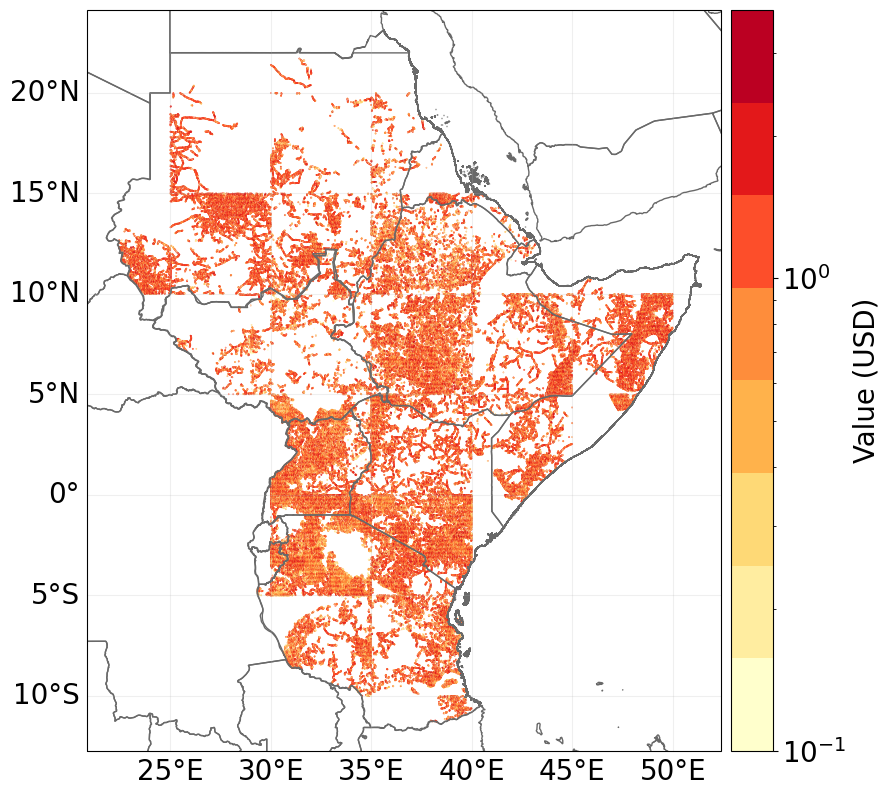

In [9]:
from climada.entity import Exposures
import matplotlib
from matplotlib.colors import LinearSegmentedColormap

import numpy as np
from matplotlib import colors
from matplotlib import pyplot as plt
#from Configuration import *
import os
import pandas as pd

import cartopy.crs as ccrs

from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

#file_path = lp_csv_files[5] # define the full file path of the CSV-file

#file_path='/home/exposure/primary_rc_ea.csv'

#file_path='/home/exposure/secondary_rc_ea.csv'

#file_path='/home/exposure/tertiary_rc_ea.csv'

#file_path='/home/exposure/nomotorway_rc_ea.csv'

file_path='/home/exposure/unclassified_rc_ea.csv'

def return_colormap():
    """
    Create colormap of matplotlib based on number of class and given colorcode

    Parameters
    ----------
    params : class object
        Input/Output parameter definitions.
        
    Returns
    -------
    c_cmap : Object
        matplotlib colormap.

    """
    c = matplotlib.colors.ColorConverter().to_rgb
    colorlist=[c("#ffffcc"), c("#ffeda0"), c("#fed976"), c("#ffb24b"), c("#fe8d3b"), c("#fd4e2a"), c("#e3181a"),c("#bb0022")]
    color_code=colorlist
    classif= [0.5, 1.0, 1.5, 2.0,2.5,3.0,3.5,4.0]
    c_cmap = LinearSegmentedColormap.from_list("my_colormap",color_code, N=len(classif), gamma=1.0)
    return c_cmap



#file_path='/home/bulbul/Documents/07-2022/impact_weather_icpac/lab/ea_climada/KEN_2021.csv'
new_exp = Exposures(pd.read_csv(file_path))
new_exp.check()

norm = colors.LogNorm(vmin=0.1, vmax=3.7)

c_cmap=return_colormap()

ax=new_exp.plot_hexbin(norm=norm, pop_name=False, cmap=c_cmap, buffer=1)
plt.legend('',frameon=False)
#ax.legend().set_visible(False)

In [ ]:
'_'.join('part0_n10e035_dem_165_buildings.csv.gz'.split('_')[1:3])

In [ ]:
3000/20

In [ ]:
import pandas as pd

db=pd.read_csv('/home/data_folder/points_s2_level_4_gzip/km_intersection/part0_n00e025_dem_175_buildings.csv.gz')
db1=db[db['bp_circle_idx'].notnull()]
db1

## country wise stats

In [1]:
import pandas as pd

db=pd.read_csv('/home/ea_1km_grid_index_ea_country_boundary.csv')

db

FileNotFoundError: [Errno 2] No such file or directory: '/home/ea_1km_grid_index_ea_country_boundary.csv'

In [19]:
db1=db.groupby(['COUNTRY'])['Nomotorway','primary','secondary','tertiary','unclassified'].sum()

/tmp/ipykernel_42/3907163337.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  db1=db.groupby(['COUNTRY'])['Nomotorway','primary','secondary','tertiary','unclassified'].sum()


In [39]:
col_list=['Nomotorway', 'primary', 'secondary', 'tertiary', 'unclassified']
db1['total'] = db1[col_list].sum(axis=1)
db1[col_list] = db1[col_list].apply(lambda x: round(x, 0))
db2=db1[['primary','secondary','tertiary','Nomotorway','unclassified','total']]
#db2.append(db2.sum(numeric_only=True), ignore_index=True)
db2.loc['EA_sum']= db2.sum(numeric_only=True, axis=0)
db2 = db2.rename({'Nomotorway': 'Unpaved'}, axis=1)
db2

,primary,secondary,tertiary,Unpaved,unclassified,total
COUNTRY,,,,,,
Burundi,240.0,202.0,785.0,1444.0,2188.0,4859.0
Djibouti,245.0,9.0,172.0,487.0,224.0,1137.0
Eritrea,705.0,171.0,822.0,1246.0,2885.0,5829.0
Ethiopia,10924.0,14867.0,37599.0,51123.0,82393.0,196906.0
Kenya,5700.0,9438.0,25712.0,35701.0,58761.0,135312.0
Rwanda,196.0,0.0,344.0,94.0,448.0,1082.0
Somalia,2793.0,2872.0,5852.0,70682.0,41166.0,123365.0
South Sudan,5782.0,4718.0,10413.0,19778.0,20876.0,61567.0
Sudan,8578.0,4466.0,32873.0,21329.0,58286.0,125532.0


In [26]:
db1.columns

Index(['Nomotorway', 'primary', 'secondary', 'tertiary', 'unclassified',
       'total'],
      dtype='object')